<a href="https://colab.research.google.com/github/AsadillahRamadhan/PCVK/blob/main/Pertemuan6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import cv2 as cv
from google.colab.patches import cv2_imshow
from skimage import io
import matplotlib.pyplot as plt
import numpy as np
import math
import os
import glob

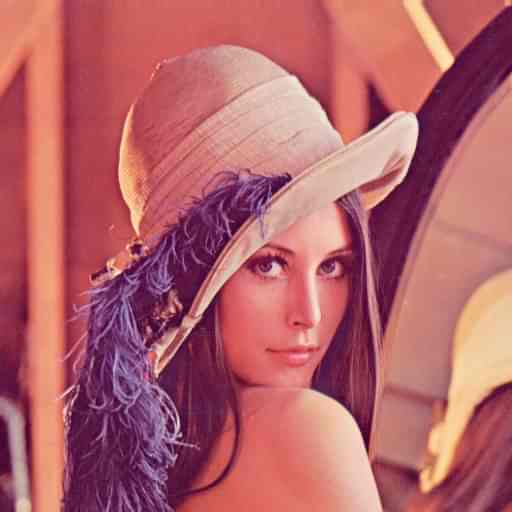

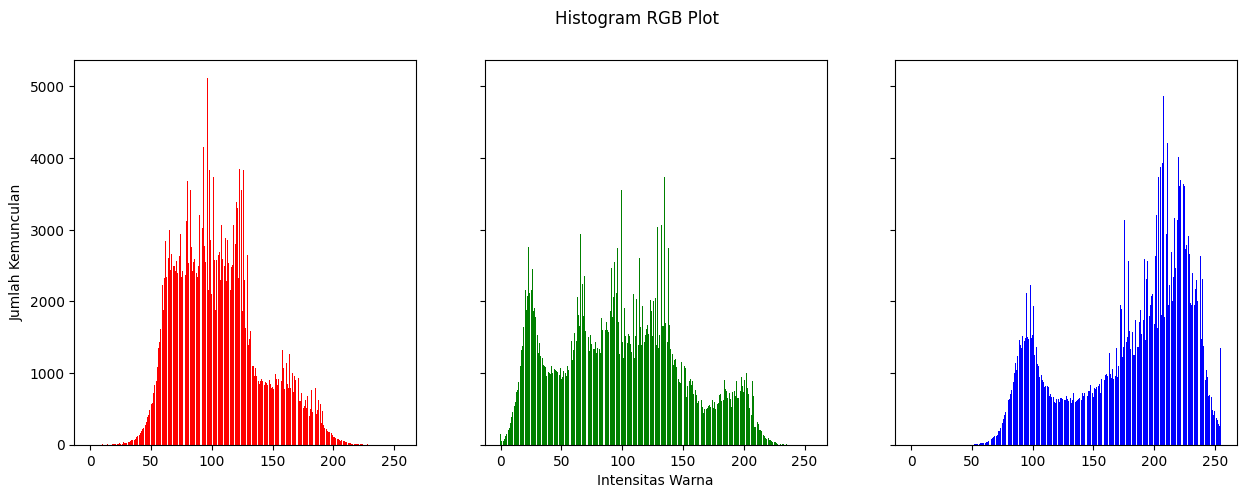

In [13]:
# 3 ( Membuat Histogram Citra Sesuai Flowchart )

image_3 = cv.imread('/content/drive/MyDrive/PCVK/Pertemuan6/lena.jpg')

red = [0] * 256
green = [0] * 256
blue = [0] * 256
intensity = []
for i in range(256):
  intensity.append(i)

for i in range(image_3.shape[0]):
  for j in range(image_3.shape[1]):
    red[image_3[i,j,0]] += 1
    green[image_3[i,j,1]] += 1
    blue[image_3[i,j,2]] += 1

cv2_imshow(image_3)
print('\n')

fig, axs = plt.subplots(1, 3, sharey=True, figsize=(15, 5))

axs[0].bar(intensity, red, color='red')
axs[1].bar(intensity, green, color='green')
axs[2].bar(intensity, blue, color='blue')
axs[1].set_xlabel('Intensitas Warna')
axs[0].set_ylabel('Jumlah Kemunculan')
plt.suptitle('Histogram RGB Plot')
plt.show()



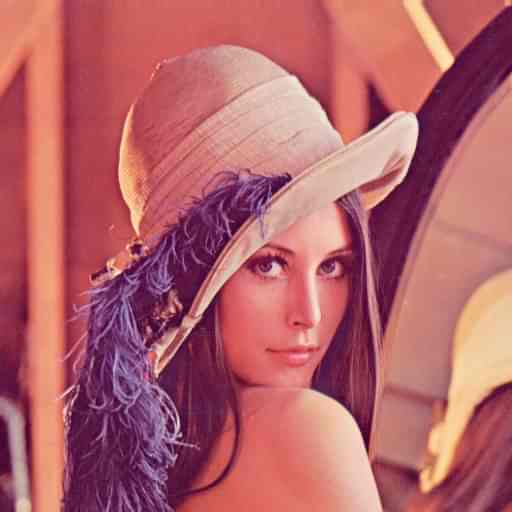



(array([   2,    1,    0,    0,    0,    0,    0,    2,    0,    1,    4,
          0,    2,    1,    5,    3,    1,    1,    6,    6,    8,    7,
         12,   14,   19,   15,   16,   32,   21,   27,   30,   40,   36,
         58,   64,   65,   69,   81,  112,  116,  138,  162,  188,  218,
        238,  271,  321,  392,  417,  486,  574,  587,  719,  837,  887,
       1089, 1351, 1435, 1609, 2230, 1887, 2328, 2838, 2335, 2610, 2999,
       2444, 2662, 2496, 2498, 2424, 2564, 2392, 2635, 2934, 2339, 2420,
       4332, 2371, 3125, 3682, 2531, 3549, 2757, 2419, 2550, 2589, 2398,
       2339, 2498, 3200, 2338, 3028, 4150, 2771, 2547, 5117, 2153, 3829,
       2851, 2101, 3735, 2573, 1877, 2575, 2654, 2689, 2296, 3065, 2588,
       2497, 2887, 2281, 2854, 2531, 2162, 2484, 2514, 3070, 2800, 3381,
       3306, 2323, 3848, 3560, 1862, 3836, 2298, 1626, 2651, 1393, 1482,
       1590, 1099, 1105,  957, 1074,  953,  893,  850,  889,  917,  896,
        834,  875,  864,  837,  902,  845,  797,

/usr/local/lib/python3.10/dist-packages/numpy/lib/stride_tricks.py:538: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  args = [np.array(_m, copy=False, subok=subok) for _m in args]


ValueError: ignored

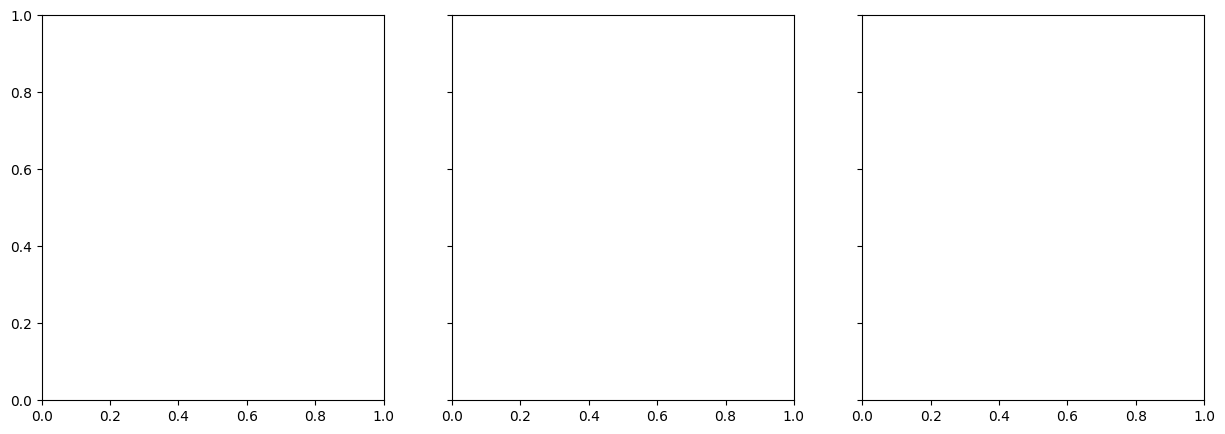

In [36]:
# 4 ( Membuat Historam dengan Library NumPy )
image_4 = cv.imread('/content/drive/MyDrive/PCVK/Pertemuan6/lena.jpg')

red = [0] * 256
green = [0] * 256
blue = [0] * 256
intensity = []
for i in range(256):
  intensity.append(i)

for i in range(image_4.shape[0]):
  for j in range(image_4.shape[1]):
    red[image_4[i,j,0]] += 1
    green[image_4[i,j,1]] += 1
    blue[image_4[i,j,2]] += 1

cv2_imshow(image_4)
print('\n')

hist_red = np.histogram(image_4[:,:,0], bins=256, range=(0, 256))
hist_green = np.histogram(green, bins=256, range=(0, 256))
hist_blue = np.histogram(blue, bins=256, range=(0, 256))
print(hist_red)


fig, axs = plt.subplots(1, 3, sharey=True, figsize=(15, 5))

axs[0].bar(intensity, hist_red, color='red')
axs[1].bar(intensity, hist_green, color='green')
axs[2].bar(intensity, hist_blue, color='blue')
axs[1].set_xlabel('Intensitas Warna')
axs[0].set_ylabel('Jumlah Kemunculan')
plt.suptitle('Histogram RGB Plot')
plt.show()

In [ ]:
# 5 ( Histogram Equalization )
image_grayscale = cv.imread('/content/drive/MyDrive/PCVK/Pertemuan6/lena.jpg', cv.IMREAD_GRAYSCALE)
image_equalization = np.zeros(image_grayscale.shape, image_grayscale.dtype)

v



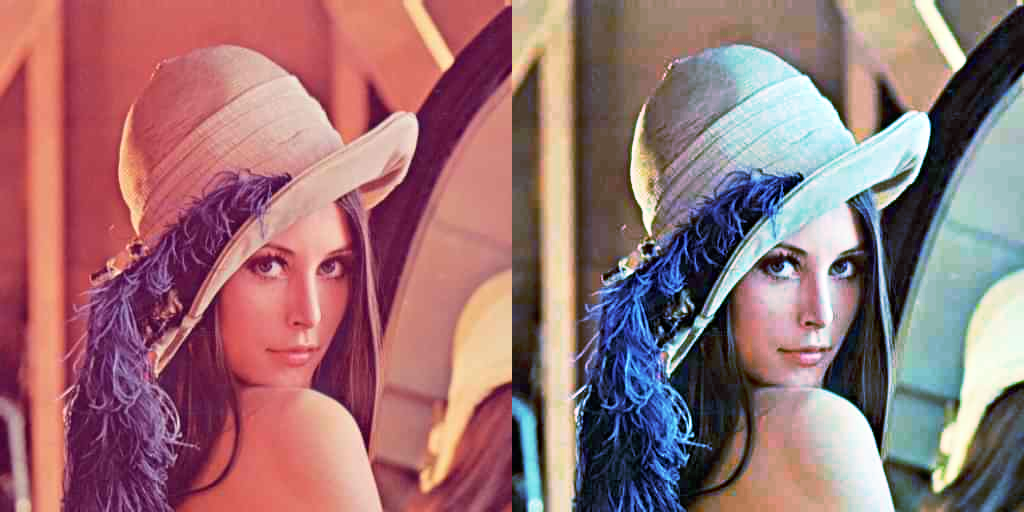

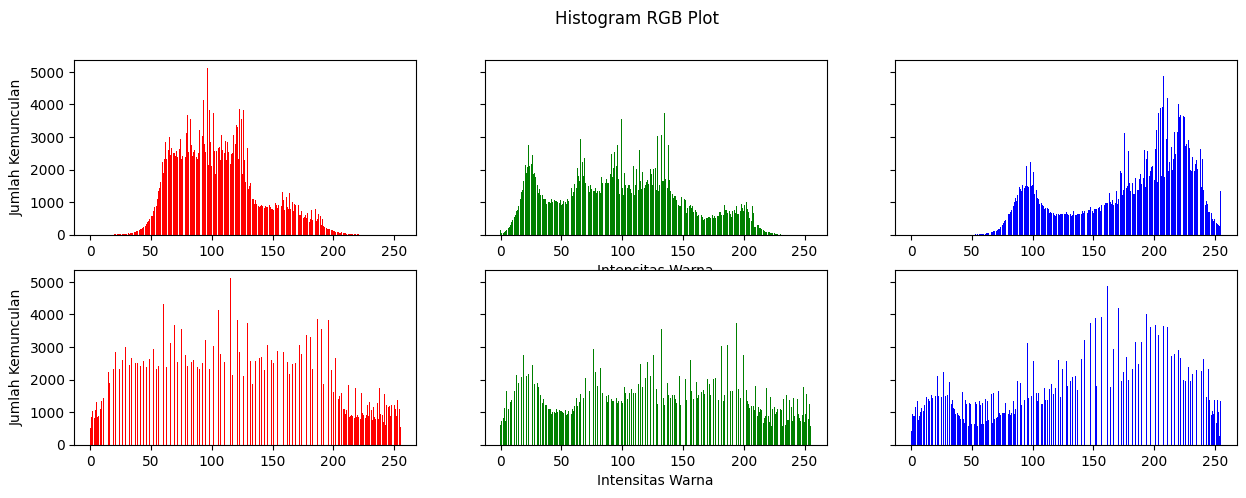

In [26]:
# 6 ( Histogram Equalization dengan function equalizeHist )
image_6 = cv.imread('/content/drive/MyDrive/PCVK/Pertemuan6/lena.jpg', cv.COLOR_BGR2RGB)
image_6_1 = cv.equalizeHist(image_6[:, :, 0])
image_6_2 = cv.equalizeHist(image_6[:, :, 1])
image_6_3 = cv.equalizeHist(image_6[:, :, 2])
image_final_6 = np.zeros(image_6.shape, image_6.dtype)

red_1 = [0] * 256
green_1 = [0] * 256
blue_1 = [0] * 256
red_2 = [0] * 256
green_2 = [0] * 256
blue_2 = [0] * 256

intensity = []
for i in range(256):
  intensity.append(i)

for x in range(image_6.shape[0]):
  for y in range(image_6.shape[1]):
    image_final_6[x,y,0] = image_6_1[x,y]
    image_final_6[x,y,1] = image_6_2[x,y]
    image_final_6[x,y,2] = image_6_3[x,y]

for i in range(image_6.shape[0]):
  for j in range(image_6.shape[1]):
    red_1[image_6[i,j,0]] += 1
    green_1[image_6[i,j,1]] += 1
    blue_1[image_6[i,j,2]] += 1

for i in range(image_final_6.shape[0]):
  for j in range(image_final_6.shape[1]):
    red_2[image_final_6[i,j,0]] += 1
    green_2[image_final_6[i,j,1]] += 1
    blue_2[image_final_6[i,j,2]] += 1

final_frame_6 = cv.hconcat((image_6, image_final_6))
cv2_imshow(final_frame_6)

fig, axs = plt.subplots(2, 3, sharey=True, figsize=(15, 5))

axs[0,0].bar(intensity, red_1, color='red')
axs[0,1].bar(intensity, green_1, color='green')
axs[0,2].bar(intensity, blue_1, color='blue')
axs[1,0].bar(intensity, red_2, color='red')
axs[1,1].bar(intensity, green_2, color='green')
axs[1,2].bar(intensity, blue_2, color='blue')
axs[0,1].set_xlabel('Intensitas Warna')
axs[0,0].set_ylabel('Jumlah Kemunculan')
axs[1,1].set_xlabel('Intensitas Warna')
axs[1,0].set_ylabel('Jumlah Kemunculan')
plt.suptitle('Histogram RGB Plot')
plt.show()



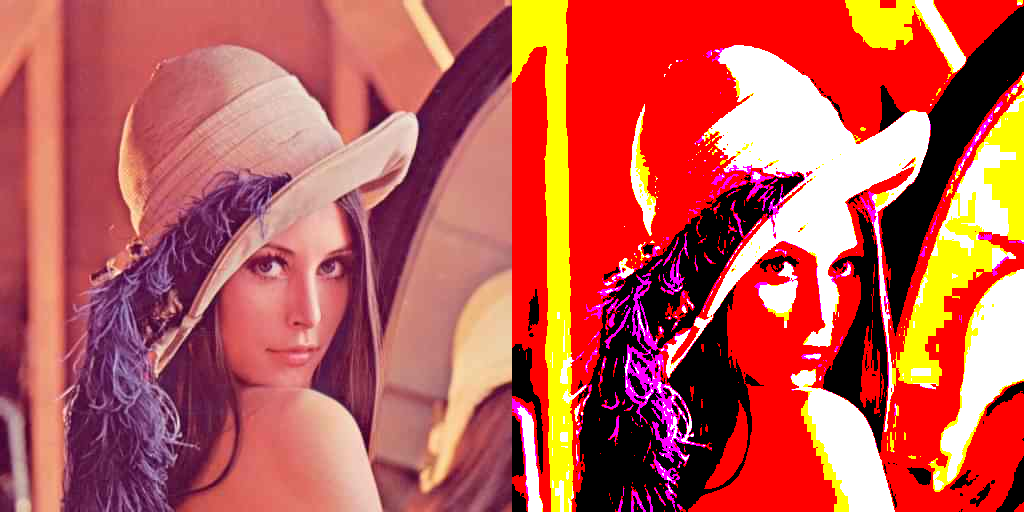

In [22]:
# 7 ( Melakukan Proses Pemetaan Ke Dalam 8 Warna )
image_7 = cv.imread('/content/drive/MyDrive/PCVK/Pertemuan6/lena.jpg', cv.COLOR_BGR2RGB)
image_mapped = np.zeros(image_7.shape, image_7.dtype)

colors = [
    [0, 0, 0],  # Black
    [0, 255, 0], # Green
    [255, 255, 0], # Yellow
    [0, 0, 255], # Blue
    [0, 255, 255], # Cyan
    [255, 0, 255], # Magenta
    [255, 255, 255] # White
]

def warna(r, g, b):
  value = 0
  min = (255 * 255) + (255 * 255) + (255 * 255) + 1
  for i in range(len(colors)):
    redDiff = r - colors[i][0]
    greenDiff = g - colors[i][1]
    blueDiff = b - colors[i][2]
    distance = redDiff * redDiff + greenDiff * greenDiff + blueDiff * blueDiff
    if(distance < min):
      min = distance
      value = i
  return value

for x in range(image_7.shape[0]):
  for y in range(image_7.shape[1]):
      newColor = warna(image_7[x,y,0], image_7[x,y,1], image_7[x,y,2])
      for c in range(image_7.shape[2]):
        image_mapped[x,y,c] = colors[newColor][c]

final_frame_7 = cv.hconcat((image_7, image_mapped))
cv2_imshow(final_frame_7)

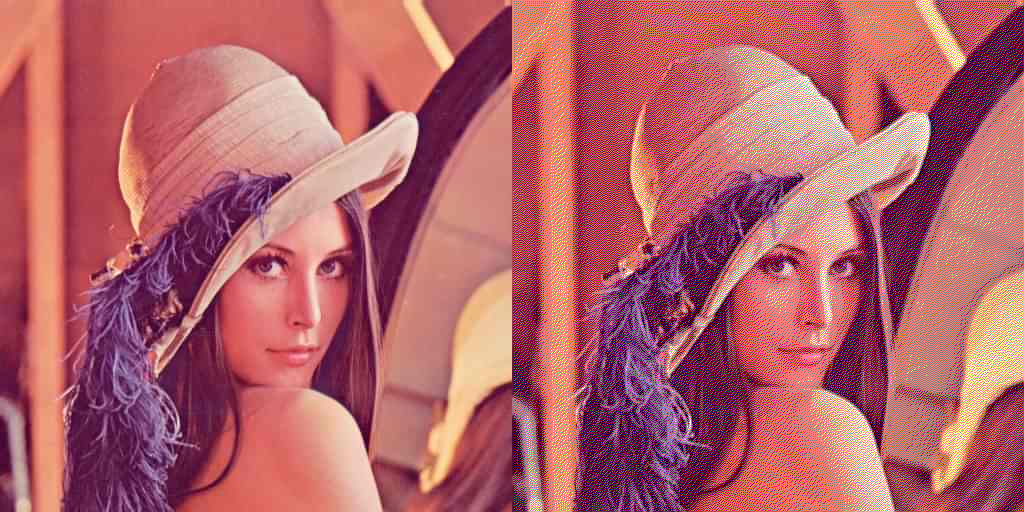

In [69]:
# 8 ( Dithering Floyd and Steinberg )
image_8 = cv.imread('/content/drive/MyDrive/PCVK/Pertemuan6/lena.jpg')
image_fas = cv.imread('/content/drive/MyDrive/PCVK/Pertemuan6/lena.jpg')

height, width, _ = image_8.shape

def threshold(nilai_warna):
  if(nilai_warna > 255):
    nilai_warna = 255
  elif(nilai_warna < 0):
    nilai_warna = 0

  return nilai_warna

for y in range(height - 1):
  for x in range(1, width - 1):
    pixelOld = [0,0,0]
    pixelNew = [0,0,0]
    error = [0,0,0]
    jarakPixel = 2
    for c in range(image_fas.shape[2]):
      pixelOld[c] = image_fas[y,x,c]
      pixelNew[c] = np.round(jarakPixel * pixelOld[c]/255.0) * (255/jarakPixel)
      image_fas[y,x,c] = pixelNew[c]
      error[c] = pixelOld[c] - pixelNew[c]
      image_fas[y+1,x,c] = threshold(image_fas[y+1,x,c] + error[c] * 7/16)
      image_fas[y+1,x+1,c] = threshold(image_fas[y+1,x+1,c] + error[c] * 3/16)
      image_fas[y,x+1,c] = threshold(image_fas[y,x+1,c] + error[c] * 5/16)
      image_fas[y-1,x+1,c] = threshold(image_fas[y-1,x+1,c] + error[c] * 1/16)


final_frame_8 = cv.hconcat((image_8, image_fas))
cv2_imshow(final_frame_8)

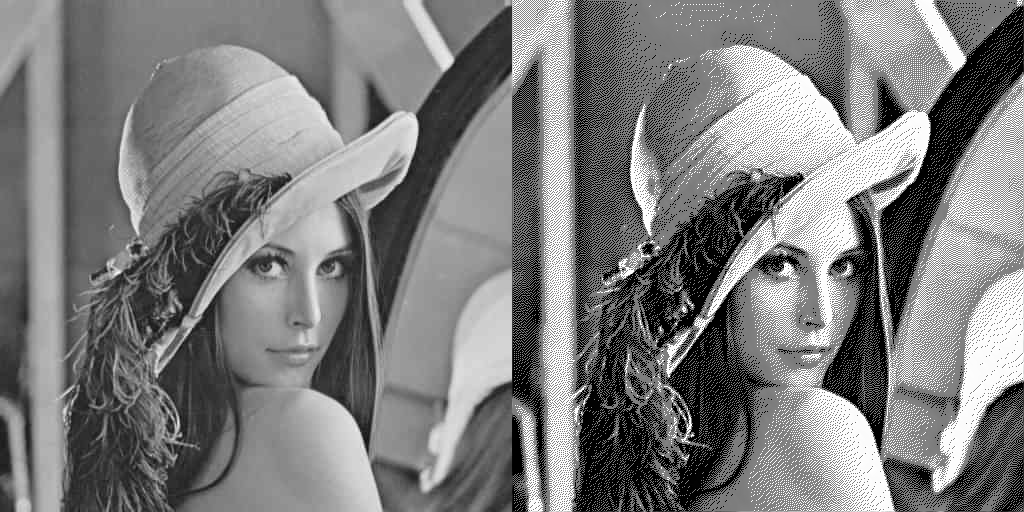

AttributeError: ignored

In [83]:
# 9 ( Mengbungkan Histogram Equalization dengan Dithering Floyd and Steinberg )
image_9 = cv.imread('/content/drive/MyDrive/PCVK/Pertemuan6/lena.jpg', 0)
image_final_9 = cv.equalizeHist(image_9)

for y in range(height - 1):
  for x in range(1, width - 1):
    pixelOld = 0
    pixelNew = 0
    error = 0
    jarakPixel = 2
    pixelOld = image_final_9[y,x]
    pixelNew = np.round(jarakPixel * pixelOld/255.0) * (255/jarakPixel)
    image_final_9[y,x] = pixelNew
    error = pixelOld - pixelNew
    image_final_9[y+1,x] = threshold(image_final_9[y+1,x] + error * 7/16)
    image_final_9[y+1,x+1] = threshold(image_final_9[y+1,x+1] + error * 3/16)
    image_final_9[y,x+1] = threshold(image_final_9[y,x+1] + error * 5/16)
    image_final_9[y-1,x+1] = threshold(image_final_9[y-1,x+1] + error * 1/16)

final_frame_9 = cv.hconcat((image_9, image_final_9))
cv2_imshow(final_frame_9)

image_9_hist = [0] * 256
image_final_9_hist = [0] * 256
intensity = []
for i in range(256):
  intensity.append(i)

for i in range(image_final_9.shape[0]):
  for j in range(image_final_9.shape[1]):
    image_9_hist[image_9[i,j]] += 1
    image_final_9_hist[image_final_9[i,j]] += 1



fig, axs = plt.subplots(1, 2, sharey=True, bins=[2000,4000,6000,8000], figsize=(15, 5))

axs[0].bar(intensity, image_9_hist, color='gray')
axs[1].bar(intensity, image_final_9_hist, color='gray')
axs[1].set_xlabel('Intensitas Warna')
axs[0].set_ylabel('Jumlah Kemunculan')
axs[0].set_xlabel('Intensitas Warna')
plt.suptitle('Histogram RGB Plot')
plt.show()

def threshold(nilai_warna):
  if(nilai_warna > 255):
    nilai_warna = 255
  elif(nilai_warna < 0):
    nilai_warna = 0

  return nilai_warna
